In [1]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar

1. DATA COLLECTION:
I downloaded data from https://webrobots.io/ which scraped data from KickStarter.com up until 05-12-2021. Data downloaded was in .csv form and will be loaded in here.

In [2]:
import os

path = os.getcwd()
df = pd.concat([pd.read_csv(f) for f in glob.glob('C:/Users/nhatp/Desktop/DS5010/Final Project/Dataset_05172021/Kickstarter*.csv')], ignore_index = True)

In [3]:
df.describe()
df.head(5)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,28,"For our 2nd full length album, we have decided...","{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",1315,US,the United States,1380457620,"{""id"":1045564870,""name"":""Brody & The Busch Rd....",USD,$,True,USD,1399507236,False,NaN,1.000000,1200.0,189897203,NaN,False,NaN,1396915236,"{""id"":2406878,""name"":""Frankenmuth"",""slug"":""fra...",Sing for My Supper Vinyl LP Pressing,NaN,"{""key"":""assets/011/583/634/e787c44818545a83b63...",1315.0,"{""id"":713997,""project_id"":713997,""state"":""inac...",sing-for-my-supper-vinyl-lp-pressing,https://www.kickstarter.com/discover/categorie...,True,False,successful,1399507237,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1315.0,international
1,19,Help me get these new songs mixed and mastered!,"{""id"":38,""name"":""Electronic Music"",""analytics_...",862,US,the United States,1471457593,"{""id"":601906188,""name"":""Jared Farrell"",""slug"":...",USD,$,True,USD,1474400807,False,NaN,1.000000,2000.0,888478499,NaN,False,NaN,1471808807,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",JARED FARRELL'S NEW ALBUM,NaN,"{""key"":""assets/013/405/577/b5c631362c825cf6333...",862.0,"{""id"":2642526,""project_id"":2642526,""state"":""in...",jared-farrells-new-album,https://www.kickstarter.com/discover/categorie...,False,False,failed,1474400808,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,862.0,international
2,60,The Eroica Trio wants to commission a new trio...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",12194,US,the United States,1361319424,"{""id"":413470524,""name"":""The Eroica Trio"",""is_r...",USD,$,True,USD,1383364740,False,NaN,1.000000,12000.0,1751991700,NaN,False,NaN,1380562577,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Bruce Wolosoff-- a new work for the Eroica Trio,NaN,"{""key"":""assets/011/483/892/00c8f97012cc31f9576...",12194.0,"{""id"":478362,""project_id"":478362,""state"":""inac...",bruce-wolosoff-a-new-work-for-the-eroica-trio,https://www.kickstarter.com/discover/categorie...,True,False,successful,1383364741,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,12194.0,international
3,0,A new twist on classic hymns. Imagine the son...,"{""id"":38,""name"":""Electronic Music"",""analytics_...",0,US,the United States,1447005290,"{""id"":885138698,""name"":""Steven Bower"",""is_regi...",USD,$,True,USD,1449600458,False,NaN,1.000000,1750.0,1840471726,NaN,False,NaN,1447008458,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Christian Hymns + Rave = Awesomeness,NaN,"{""key"":""assets/012/301/575/30cce88bc6fc993587b...",0.0,"{""id"":2217338,""project_id"":2217338,""state"":""in...",christian-hymns-rave-awesomeness,https://www.kickstarter.com/discover/categorie...,False,False,failed,1449600458,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,0.0,international
4,0,Spam studios for the up and coming youth of We...,"{""id"":319,""name"":""Kids"",""analytics_name"":""Kids...",0,GB,the United Kingdom,1403696868,"{""id"":525583114,""name"":""Adam Poules"",""is_regis...",GBP,£,False,USD,1408746101,False,NaN,1.406145,10000.0,10457111,NaN,False,NaN,1404858101,"{""id"":12070,""name"":""Batley"",""slug"":""batley-gb""...","""Spam"" The Music Recording Studio",NaN,"{""key"":""assets/011/732/564/8119984d171ec52deab...",0.0,"{""id"":1083906,""project_id"":1083906,""state"":""in...",spam-the-music-recording-studio,https://www.kickstarter.com/discover/categorie...,False,False,failed,1408746101,1.71

In [4]:
df.country.unique()

array(['US', 'GB', 'CA', 'NL', 'IT', 'DE', 'DK', 'CH', 'MX', 'AT', 'AU',
       'SE', 'ES', 'JP', 'NO', 'BE', 'FR', 'NZ', 'IE', 'SG', 'HK', 'PL',
       'SI', 'GR', 'LU'], dtype=object)

In [5]:
df.country_displayable_name.unique()

array(['the United States', 'the United Kingdom', 'Canada',
       'the Netherlands', 'Italy', 'Germany', 'Denmark', 'Switzerland',
       'Mexico', 'Austria', 'Australia', 'Sweden', 'Spain', 'Japan',
       'Norway', 'Belgium', 'France', 'New Zealand', 'Ireland',
       'Singapore', 'Hong Kong', 'Poland', 'Slovenia', 'Greece',
       'Luxembourg'], dtype=object)

We start data-processing <br> 
-backers_count - number of people who contributed funds to the project<br> 
-blurb - short description of the project<br> 
-category - contains the category and sub-category of the project<br> 
-converted_pledged_amount - amount of money pledged, converted to the currency in the 'current_currency' column<br> 
-country - country the project creator is from<br> 
-created_at - date and time of when the project was initially created on Kickstarter<br> 
-creator - name of the project creator and other information about them, e.g. Kickstarter id number<br> 
-currency - original currency the project goal was denominated in<br> 
-currency_symbol - symbol of the original currency the project goal was denominated in<br> 
-currency_trailing_code - code of the original currency the project goal was denominated in<br> 
-current_currency - currency the project goal was converted to<br> 
-deadline - date and time of when the project will close for donations<br> 
-disable_communication - whether or not a project owner disabled communication with their backers<br> 
-friends - unclear (null or empty)<br> 
-fx_rate - foreign exchange rate between the original currency and the current_currency<br> 
-goal - funding goal<br> 
-id - id number of the project<br> 
-is_backing - unclear (null or false)<br> 
-is_starrable - whether or not a project can be starred (liked and saved) by users<br> 
-is_starred - whether or not a project has been starred (liked and saved) by users<br> 
-launched_at - date and time of when the project was launched for funding<br> 
-location - contains the town or city of the project creator<br> 
-name - name of the project<br> 
-permissions - unclear (null or empty)<br> 
-photo - contains a link and information to the project's photo/s<br> 
-pledged - amount pledged in the current_currency<br> 
-profile - details about the project's profile, including id number and various visual settings<br> 
-slug - name of the project with hyphens instead of spaces<br> 
-source_url - url for the project's category<br> 
-spotlight - after a project has been successful, it is spotlighted on the Kickstarter website<br> 
-staff_pick - whether a project was highlighted as a staff_pick when it was launched/live<br> 
-state - whether a project was successful, failed, canceled, suspending or still live<br> 
-state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)<br> 
-static_usd_rate - conversion rate between the original currency and USD<br> 
-urls - url to the project's page<br> 
-usd_pledged - amount pledged in USD<br> 
-usd_type - domestic or international<br> 
-spotlight - after a project has been successful, it is spotlighted on the Kickstarter website --> strongly correlate with successful<br> 


To dos:
created_at, deadline, launched_at, state_changed_at : convert to datetime
what is friends, slug, usd_pledged

2. Then comes cleaning and manipulating the data for our model. Data Exploration and cleaning helps us to remove outliers, missing values and transform the data into the required format.

In [6]:
#Dropping columns that are not useful
df=df.drop(['converted_pledged_amount', 'country_displayable_name', 'creator','currency','currency_symbol','currency_trailing_code','current_currency','friends', 'fx_rate', 'is_backing', 'permissions', 'photo', 'pledged', 'state_changed_at', 'slug', 'urls', 'usd_type', 'source_url','profile'],axis=1)

In [7]:
df.is_starred.value_counts(normalize=True)
df.drop('is_starred', axis=1, inplace=True)

Dropping columns that are not useful: <br> 
converted_pledged_amount <br> 
country_displayable_name: just need abbreviations <br> 
creator: do not know any further info so not useful <br> 
currency: will convert all to USD anyways   <br> 
currency_symbol    <br> 
currency_trailing_code     <br> 
current_currency <br>
friends: NA<br>
fx_rate: eventually  <br>
is_backing<br>
permissions<br>
photo<br>
pledged: in current currency. we will keep the usd-converted value<br>
state_changed_at: similar to deadline <br>
slug: NA<br>
urls: not useful<br>
usd_type: not useful<br>
source_url: not useful<br>
profile: current state (of the data scraping date) - so most are inactive anyways <br>

__Dates:__<br>
Columns containing dates are currently stored in unix time, and need to be converted to datetime. Because they have been converted from unix, all times are in UTC/GMT.

In [8]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [9]:
df.head(5)

,backers_count,blurb,category,country,created_at,deadline,disable_communication,goal,id,is_starrable,launched_at,location,name,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged
0,28,"For our 2nd full length album, we have decided...","{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",US,2013-09-29 12:27:00,2014-05-08 00:00:36,False,1200.0,189897203,False,2014-04-08 00:00:36,"{""id"":2406878,""name"":""Frankenmuth"",""slug"":""fra...",Sing for My Supper Vinyl LP Pressing,True,False,successful,1.000000,1.000000,1315.0
1,19,Help me get these new songs mixed and mastered!,"{""id"":38,""name"":""Electronic Music"",""analytics_...",US,2016-08-17 18:13:13,2016-09-20 19:46:47,False,2000.0,888478499,False,2016-08-21 19:46:47,"{""id"":2442047,""name"":""Los Angeles"",""slug"":""los...",JARED FARRELL'S NEW ALBUM,False,False,failed,1.000000,1.000000,862.0
2,60,The Eroica Trio wants to commission a new trio...,"{""id"":36,""name"":""Classical Music"",""analytics_n...",US,2013-02-20 00:17:04,2013-11-02 03:59:00,False,12000.0,1751991700,False,2013-09-30 17:36:17,"{""id"":2459115,""name"":""New York"",""slug"":""new-yo...",Bruce Wolosoff-- a new work for the Eroica Trio,True,False,successful,1.000000,1.000000,12194.0
3,0,A new twist on classic hymns. Imagine the son...,"{""id"":38,""name"":""Electronic Music"",""analytics_...",US,2015-11-08 17:54:50,2015-12-08 18:47:38,False,1750.0,1840471726,False,2015-11-08 18:47:38,"{""id"":2383660,""name"":""Columbus"",""slug"":""columb...",Christian Hymns + Rave = Awesomeness,False,False,failed,1.000000,1.000000,0.0
4,0,Spam studios for the up and coming youth of We...,"{""id"":319,""name"":""Kids"",""analytics_name"":""Kids...",GB,2014-06-25 11:47:48,2014-08-22 22:21:41,False,10000.0,10457111,False,2014-07-08 22:21:41,"{""id"":12070,""name"":""Batley"",""slug"":""batley-gb""...","""Spam"" The Music Recording Studio",False,False,failed,1.714466,1.657803,0.0


In [10]:
print("Dataset contains projects created from", df['created_at'].min().strftime("%d %B, %Y"), "to", df['created_at'].max().strftime("%d %B, %Y"))
print("Dataset contains projects launched from", df['launched_at'].min().strftime("%d %B, %Y"), "to", df['launched_at'].max().strftime("%d %B, %Y"))
print("Funding goals range from", df['goal'].min(), "to", df['goal'].max()," dollars")
print("Funding goals range from", df['usd_pledged'].min(), "to", df['usd_pledged'].max()," dollars")

Dataset contains projects created from 22 April, 2009 to 12 May, 2021
Dataset contains projects launched from 25 April, 2009 to 13 May, 2021
Funding goals range from 0.01 to 100000000.0  dollars
Funding goals range from 0.0 to 11385449.05  dollars


__Blurb and Name Lengths__

In [11]:
#count number of words in the name, then drop the "blurb" column
df['blurb_length'] = df['blurb'].str.split().str.len()
df.drop('blurb', axis=1, inplace=True)


In [12]:
#count number of words in the project name, then drop the "name" column
df['name_length'] = df['name'].str.split().str.len()
df.drop('name', axis=1, inplace=True)


__Categories:__<br>
The category variable is currently stored as a string, although it was clearly originally a dictionary. The example below shows that each project has both a category (e.g. games) and a sub-category (e.g. tabletop games). Both will be extracted.

In [13]:
#in the category variable, we only care about category and sub-category 
df['category'][2]

'{"id":36,"name":"Classical Music","analytics_name":"Classical Music","slug":"music/classical music","position":3,"parent_id":14,"parent_name":"Music","color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/classical%20music"}}}'

In [14]:
#result = re.search('"(.*)","position"', df['category'])
#print(result.group(1))
df['category_name']=df['category'].apply(lambda st: st[st.find('"slug":"')+8:st.find('","position"')])
df.drop('category', axis=1, inplace=True)
cat_name = df['category_name'].str.split("/", n = 1, expand = True)
df['category']= cat_name[0]
df['sub_category']= cat_name[1]
df.drop('category_name', axis=1, inplace=True)

In [15]:
# Counting the number of unique categories
print(f"There are {df.category.nunique()} unique categories and {df.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 146 unique sub-categories.


__Disable_communication__:
100% of project owners did not disable communication with their backers (unsurprisingly). Because nearly all projects have the same value for this variable, it will be dropped as it does not provide much information.

In [16]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize=True)
df.drop('disable_communication', axis=1, inplace=True)

__Goals:__
Currently in native currency - we will convert to USD using static_usd_rate

In [17]:
df['usd_goal']=df['goal']*df['static_usd_rate']
df.drop('goal', axis=1, inplace=True)

__Is_starrable:__
Only 2.67% of projects were starrable by users. Although this is only a very small proportion, whether or not a project was liked and saved by users is likely to be informative about whether or not a project was successful, so the variable will be kept for now and assessed again once irrelevant rows have been dropped, to check if it is still useful.

In [18]:
# Checking the proportions of each category
df.is_starrable.value_counts(normalize=True)

False    0.973322
True     0.026678
Name: is_starrable, dtype: float64

__Location__:
The location field contains the town/city that a project originates from, as well as the country. Because the country is already recorded separately in the country field, and there are such a large number of unique categories (making one-hot encoding not useful, particularly as there are likely to be a lot of smaller towns and cities with very few projects), the column will be dropped.

In [19]:
#df.location.nunique()
df.drop('location', axis=1, inplace=True)

__usd_pledged:__<br>
round up to 2 decimals

In [20]:
df['usd_pledged'] = round(df['usd_pledged'],2)
df['usd_goal'] = round(df['usd_goal'],2)
df.head(10)

,backers_count,country,created_at,deadline,id,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal
0,28,US,2013-09-29 12:27:00,2014-05-08 00:00:36,189897203,False,2014-04-08 00:00:36,True,False,successful,1.000000,1.000000,1315.00,22.0,7,music,indie rock,1200.00
1,19,US,2016-08-17 18:13:13,2016-09-20 19:46:47,888478499,False,2016-08-21 19:46:47,False,False,failed,1.000000,1.000000,862.00,9.0,4,music,electronic music,2000.00
2,60,US,2013-02-20 00:17:04,2013-11-02 03:59:00,1751991700,False,2013-09-30 17:36:17,True,False,successful,1.000000,1.000000,12194.00,13.0,9,music,classical music,12000.00
3,0,US,2015-11-08 17:54:50,2015-12-08 18:47:38,1840471726,False,2015-11-08 18:47:38,False,False,failed,1.000000,1.000000,0.00,16.0,6,music,electronic music,1750.00
4,0,GB,2014-06-25 11:47:48,2014-08-22 22:21:41,10457111,False,2014-07-08 22:21:41,False,False,failed,1.714466,1.657803,0.00,20.0,5,music,kids,17144.66
5,31,US,2013-03-31 15:41:16,2013-06-06 01:51:00,266907685,False,2013-05-07 01:51:00,True,False,successful,1.000000,1.000000,1575.00,20.0,10,music,jazz,1500.00
6,0,GB,2016-02-11 15:13:39,2016-03-13 10:37:08,100385010,False,2016-02-12 11:37:08,False,False,failed,1.453845,1.432503,0.00,14.0,2,music,electronic music,1453.85
7,79,US,2014-02-10 18:53:14,2014-03-22 15:24:33,853400946,False,2014-02-20 16:24:33,True,True,successful,1.000000,1.000000,6181.24,22.0,8,music,indie rock,6049.00
8,53,US,2011-03-14 20:44:13,2011-05-19 17:27:55,1167394456,False,2011-03-19 17:27:55,True,False,successful,1.000000,1.000000,5735.00,12.0,4,music,classical music,5000.00
9,5,US,2016-08-04 00:31:10,2016-09-03 01:24:43,841978464,False,2016-08-04 01:24:43,False,False,failed,1.000000,1.000000,5.00,22.0,4,journalism,web,1000.00


__Calculating other features:__
- days from creation to launch: (from created_at to launched_at)
- days of campaigns: (from launch to deadline)
- launch day of week
- deadline day of week
- launch month
- deadline month
- launch time of day
- deadline time of day
- mean pledge per backer

In [21]:
df['creation_to_launch'] = (df['launched_at']-df['created_at']).dt.days
df['campaign_length']=(df['deadline']-df['launched_at']).dt.days

In [22]:
df['launch_day']=df['launched_at'].dt.day_name()
df['deadline_day']=df['deadline'].dt.day_name()
df['launch_month']=df['launched_at'].dt.month_name()
df['deadline_month']=df['deadline'].dt.month_name()
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launch date
df['deadline_hour'] = df['deadline'].dt.hour # Extracting hour from deadline

In [23]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

In [24]:
df.head(10)

,backers_count,country,created_at,deadline,id,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour,pledge_per_backer
0,28,US,2013-09-29 12:27:00,2014-05-08 00:00:36,189897203,False,2014-04-08 00:00:36,True,False,successful,1.000000,1.000000,1315.00,22.0,7,music,indie rock,1200.00,190,30,Tuesday,Thursday,April,May,0,0,46.96
1,19,US,2016-08-17 18:13:13,2016-09-20 19:46:47,888478499,False,2016-08-21 19:46:47,False,False,failed,1.000000,1.000000,862.00,9.0,4,music,electronic music,2000.00,4,30,Sunday,Tuesday,August,September,19,19,45.37
2,60,US,2013-02-20 00:17:04,2013-11-02 03:59:00,1751991700,False,2013-09-30 17:36:17,True,False,successful,1.000000,1.000000,12194.00,13.0,9,music,classical music,12000.00,222,32,Monday,Saturday,September,November,17,3,203.23
3,0,US,2015-11-08 17:54:50,2015-12-08 18:47:38,1840471726,False,2015-11-08 18:47:38,False,False,failed,1.000000,1.000000,0.00,16.0,6,music,electronic music,1750.00,0,30,Sunday,Tuesday,November,December,18,18,NaN
4,0,GB,2014-06-25 11:47:48,2014-08-22 22:21:41,10457111,False,2014-07-08 22:21:41,False,False,failed,1.714466,1.657803,0.00,20.0,5,music,kids,17144.66,13,45,Tuesday,Friday,July,August,22,22,NaN
5,31,US,2013-03-31 15:41:16,2013-06-06 01:51:00,266907685,False,2013-05-07 01:51:00,True,False,successful,1.000000,1.000000,1575.00,20.0,10,music,jazz,1500.00,36,30,Tuesday,Thursday,May,June,1,1,50.81
6,0,GB,2016-02-11 15:13:39,2016-03-13 10:37:08,100385010,False,2016-02-12 11:37:08,False,False,failed,1.453845,1.432503,0.00,14.0,2,music,electronic music,1453.85,0,29,Friday,Sunday,February,March,11,10,NaN
7,79,US,2014-02-10 18:53:14,2014-03-22 15:24:33,853400946,False,2014-02-20 16:24:33,True,True,successful,1.000000,1.000000,6181.24,22.0,8,music,indie rock,6049.00,9,29,Thursday,Saturday,February,March,16,15,78.24
8,53,US,2011-03-14 20:44:13,2011-05-19 17:27:55,1167394456,False,2011-03-19 17:27:55,True,False,successful,1.000000,1.000000,5735.00,12.0,4,music,classical music,5000.00,4,61,Saturday,Thursday,March,May,17,17,108.21
9,5,US,2016-08-04 00:31:10,2016-09-03 01:24:43,841978464,False,2016-08-04 01:24:43,False,False,failed,1.000000,1.000000,5.00,22.0,4,journalism,web,1000.00,0,30,Thursday,Saturday,August,September,1,1,1.00


__Checking for null values:__

In [25]:
df.isna().sum()

backers_count             0
country                   0
created_at                0
deadline                  0
id                        0
is_starrable              0
launched_at               0
spotlight                 0
staff_pick                0
state                     0
static_usd_rate           0
usd_exchange_rate         0
usd_pledged               0
blurb_length              8
name_length               0
category                  0
sub_category           8252
usd_goal                  0
creation_to_launch        0
campaign_length           0
launch_day                0
deadline_day              0
launch_month              0
deadline_month            0
launch_hour               0
deadline_hour             0
pledge_per_backer     15602
dtype: int64

In [26]:
# Replacing null values for blurb_length with 0
df.blurb_length.fillna(0, inplace=True)

In [27]:
# Confirming there are no null values remaining
df.isna().sum().sum()

23854

In [28]:
df[df['sub_category'].isna()]

,backers_count,country,created_at,deadline,id,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour,pledge_per_backer
92,2,US,2021-03-27 13:50:13,2021-07-01 13:00:00,1037663691,True,2021-05-12 17:59:23,False,False,live,1.00000,1.00000,38.00,6.0,6,music,None,5000.00,46,49,Wednesday,Thursday,May,July,17,13,19.00
117,51,CA,2019-07-22 21:09:18,2019-10-01 03:59:00,318389956,False,2019-08-19 22:30:09,True,False,successful,0.75327,0.75541,3163.95,5.0,5,music,None,1506.54,28,42,Monday,Tuesday,August,October,22,3,62.04
130,166,US,2020-02-10 16:09:15,2020-03-14 00:45:44,2128321045,False,2020-02-19 01:45:44,True,False,successful,1.00000,1.00000,15445.69,17.0,5,music,None,14000.00,8,23,Wednesday,Saturday,February,March,1,0,93.05
180,87,US,2021-04-05 17:29:02,2021-05-31 16:53:33,567659494,True,2021-05-01 16:53:33,False,False,live,1.00000,1.00000,3424.00,5.0,5,music,None,5000.00,25,30,Saturday,Monday,May,May,16,16,39.36
202,25,US,2019-10-08 15:10:30,2019-11-20 16:59:42,1941693435,False,2019-10-21 15:59:42,True,False,successful,1.00000,1.00000,2510.00,13.0,9,music,None,2500.00,13,30,Monday,Wednesday,October,November,15,16,100.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224262,88,US,2013-09-06 22:32:49,2013-11-14 01:40:45,535654299,False,2013-10-15 00:40:45,True,False,successful,1.00000,1.00000,8635.00,22.0,5,journalism,None,7500.00,38,30,Tuesday,Thursday,October,November,0,1,98.12
224312,67,US,2011-06-04 16:39:49,2011-07-14 15:18:00,646917148,False,2011-06-05 15:42:10,True,False,successful,1.00000,1.00000,6070.00,22.0,2,journalism,None,6000.00,0,38,Sunday,Thursday,June,July,15,15,90.60
224314,20,US,2015-01-29 22:45:09,2015-03-20 17:41:00,937572732,False,2015-02-03 18:41:00,True,False,successful,1.00000,1.00000,1013.00,22.0,5,journalism,None,750.00,4,44,Tuesday,Friday,February,March,18,17,50.65
224322,40,US,2019-04-18 12:50:41,2019-06-01 04:00:00,53524994,False,2019-04-23 01:16:16,False,True,failed,1.00000,1.00000,3352.00,17.0,8,journalism,None,30000.00,4,39,Tuesday,Saturday,April,June,1,4,83.80


__Dropping rows__:

This project aims to predict whether projects succeed or fail. The dataset also includes canceled, live (i.e. not yet finished) and suspended projects. These will now be removed.

In [29]:
# Number of projects of different states
df.state.value_counts()

successful    132398
failed         76649
canceled        9314
live            6096
Name: state, dtype: int64

In [30]:
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

In [31]:
df.isna().sum()

backers_count             0
country                   0
created_at                0
deadline                  0
id                        0
is_starrable              0
launched_at               0
spotlight                 0
staff_pick                0
state                     0
static_usd_rate           0
usd_exchange_rate         0
usd_pledged               0
blurb_length              0
name_length               0
category                  0
sub_category           7726
usd_goal                  0
creation_to_launch        0
campaign_length           0
launch_day                0
deadline_day              0
launch_month              0
deadline_month            0
launch_hour               0
deadline_hour             0
pledge_per_backer     12865
dtype: int64

In [32]:
# Confirming that the most recent deadline is the day on which the data was scraped, i.e. there are no projects which have yet to be resolved into either successes or failures
max(df.deadline)

Timestamp('2021-05-13 15:00:11')

__Check for duplicates:__

In [33]:
# Checking for duplicates of individual projects
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")

Of the 209047 projects in the dataset, there are 24962 which are listed more than once.


In [34]:
print(f"Of these, {len(df[df.duplicated()])} have every value in common between duplicates.")

Of these, 24946 have every value in common between duplicates.


In [35]:
# Dropping duplicates which have every value in common
df.drop_duplicates(inplace=True)

In [36]:
len(df)

184101

In [37]:
print(len(df[df.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated.head(10)

16 duplicated projects remain.


,backers_count,country,created_at,deadline,id,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour,pledge_per_backer
4044,163,MX,2020-11-11 18:39:23,2021-01-17 04:28:47,142591920,False,2020-11-18 04:28:47,True,False,successful,0.049234,0.050505,7603.09,18.0,7,comics,graphic novels,7385.04,6,60,Wednesday,Sunday,November,January,4,4,46.64
165330,163,MX,2020-11-11 18:39:23,2021-01-17 04:28:47,142591920,False,2020-11-18 04:28:47,True,False,successful,0.049307,0.050505,7614.37,18.0,7,comics,graphic novels,7396.00,6,60,Wednesday,Sunday,November,January,4,4,46.71
33677,18,DE,2017-01-11 01:26:20,2017-02-10 01:26:00,213423366,False,2017-01-11 02:40:18,True,False,successful,1.052645,1.068791,685.27,24.0,10,crafts,embroidery,526.32,0,29,Wednesday,Friday,January,February,2,1,38.07
117779,18,DE,2017-01-11 01:26:20,2017-02-10 01:26:00,213423366,False,2017-01-11 02:40:18,True,False,successful,1.060828,1.068791,690.60,24.0,10,crafts,embroidery,530.41,0,29,Wednesday,Friday,January,February,2,1,38.37
5875,747,CA,2020-07-27 23:58:16,2021-02-04 04:55:03,278929731,False,2020-12-21 04:55:03,True,False,successful,0.782193,0.782424,50651.13,20.0,9,design,product design,27376.75,146,45,Monday,Thursday,December,February,4,4,67.81
69638,747,CA,2020-07-27 23:58:16,2021-02-04 04:55:03,278929731,False,2020-12-21 04:55:03,True,False,successful,0.781956,0.782424,50635.76,20.0,9,design,product design,27368.45,146,45,Monday,Thursday,December,February,4,4,67.79
134372,2140,DE,2020-12-14 07:48:41,2021-01-31 22:59:00,281806200,False,2020-12-24 00:27:18,True,False,successful,1.222321,1.213750,98783.79,2.0,2,games,puzzles,18334.81,9,38,Thursday,Sunday,December,January,0,22,46.16
41171,2140,DE,2020-12-14 07:48:41,2021-01-31 22:59:00,281806200,False,2020-12-24 00:27:18,True,False,successful,1.218811,1.213750,98500.13,2.0,2,games,puzzles,18282.16,9,38,Thursday,Sunday,December,January,0,22,46.03
41274,3,NZ,2014-09-29 10:01:29,2014-10-15 02:35:02,283380798,False,2014-10-01 02:35:02,True,False,successful,0.774276,0.790755,92.91,20.0,8,journalism,web,77.43,1,14,Wednesday,Wednesday,October,October,2,2,30.97
200086,3,NZ,2014-09-29 10:01:29,2014-10-15 02:35:02,283380798,False,2014-10-01 02:35:02,True,False,successful,0.777489,0.790755,93.30,20.0,8,journalism,web,77.75,1,14,Wednesday,Wednesday,October,October,2,2,31.10


We notice that for each pair of duplicates, there are differences in the usd_pledge and usd_goal columns. The differences are only in the order of a few cents or dollars, so it does not make much difference which one is kept. Therefore the first one of each pair will be dropped.

In [38]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

Each project id is unique now, so we will set the id column as the index:

In [39]:
# Setting the id column as the index
df.set_index('id', inplace=True)
df.head()

,backers_count,country,created_at,deadline,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,,,,,,,,
189897203,28,US,2013-09-29 12:27:00,2014-05-08 00:00:36,False,2014-04-08 00:00:36,True,False,successful,1.000000,1.000000,1315.0,22.0,7,music,indie rock,1200.00,190,30,Tuesday,Thursday,April,May,0,0,46.96
888478499,19,US,2016-08-17 18:13:13,2016-09-20 19:46:47,False,2016-08-21 19:46:47,False,False,failed,1.000000,1.000000,862.0,9.0,4,music,electronic music,2000.00,4,30,Sunday,Tuesday,August,September,19,19,45.37
1751991700,60,US,2013-02-20 00:17:04,2013-11-02 03:59:00,False,2013-09-30 17:36:17,True,False,successful,1.000000,1.000000,12194.0,13.0,9,music,classical music,12000.00,222,32,Monday,Saturday,September,November,17,3,203.23
1840471726,0,US,2015-11-08 17:54:50,2015-12-08 18:47:38,False,2015-11-08 18:47:38,False,False,failed,1.000000,1.000000,0.0,16.0,6,music,electronic music,1750.00,0,30,Sunday,Tuesday,November,December,18,18,NaN
10457111,0,GB,2014-06-25 11:47:48,2014-08-22 22:21:41,False,2014-07-08 22:21:41,False,False,failed,1.714466,1.657803,0.0,20.0,5,music,kids,17144.66,13,45,Tuesday,Friday,July,August,22,22,NaN


__Exploratory Data Analysis__


__Key Statistics__<br>
- total amount pledged <br>
- total goals<br>
- success vs failure counts<br>
- mean amount pledged successful vs failed projects<br>
- mean backers per project<br>
- mean pledge per backer<br>
- mean campaign days<br>

In [40]:
df.describe() #for numeric variables

,backers_count,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,usd_goal,creation_to_launch,campaign_length,launch_hour,deadline_hour,pledge_per_backer
count,184085.000000,184085.000000,184085.000000,1.840850e+05,184085.000000,184085.000000,1.840850e+05,184085.000000,184085.000000,184085.000000,184085.000000,171311.000000
mean,150.952408,1.003114,1.002642,1.380473e+04,18.080447,5.677980,3.823044e+04,47.993889,32.778906,13.588293,12.660456,78.571355
std,949.793720,0.241097,0.240495,1.050179e+05,5.523417,2.684301,1.068936e+06,138.137886,12.219096,6.786964,7.249767,146.200970
min,0.000000,0.008771,0.008768,0.000000e+00,0.000000,1.000000,1.000000e-02,0.000000,1.000000,0.000000,0.000000,0.460000
25%,4.000000,1.000000,1.000000,1.220000e+02,15.000000,4.000000,1.500000e+03,3.000000,29.000000,9.000000,5.000000,26.590000
50%,28.000000,1.000000,1.000000,1.642000e+03,19.000000,5.000000,4.900000e+03,11.000000,30.000000,15.000000,15.000000,50.000000
75%,93.000000,1.000000,1.000000,6.849430e+03,22.000000,8.000000,1.200000e+04,36.000000,35.000000,19.000000,19.000000,88.440000
max,105857.000000,1.716408,1.716408,1.138545e+07,43.000000,27.000000,1.523501e+08,3303.000000,120.000000,23.000000,23.000000,10000.000000


In [41]:
#total amount pledged:
print("${:,.0f}".format(df.usd_pledged.sum()))

#total funding goal:
print("${:,.0f}".format(df.usd_goal.sum()))

#success vs failure counts
print(len(df[df['state']=='successful']))
print(len(df[df['state']=='failed']))

#mean amount pledged successful vs failed projects
print("${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))

#mean backers per project
print(int(round(df['backers_count'].mean(),0)))

#mean pledge per backer
print("${0:,.0f}".format(df.pledge_per_backer.mean()))

#mean campaign days
print(int(round(df.campaign_length.mean(),0)))

$2,541,243,801
$7,037,649,744
108269
75816
$22,728
$1,062
151
$79
33


__How do succesful and failed projects differ?__
- number of backers
- goal amount
- pledged amount
- pledged per backer
- name length
- blurb length
- campaign length
- creation to launch length
- number of success and fails
- number of starrable projects
- top categories
- popular launch day
- popular launch month


Text(0.5, 0, '')

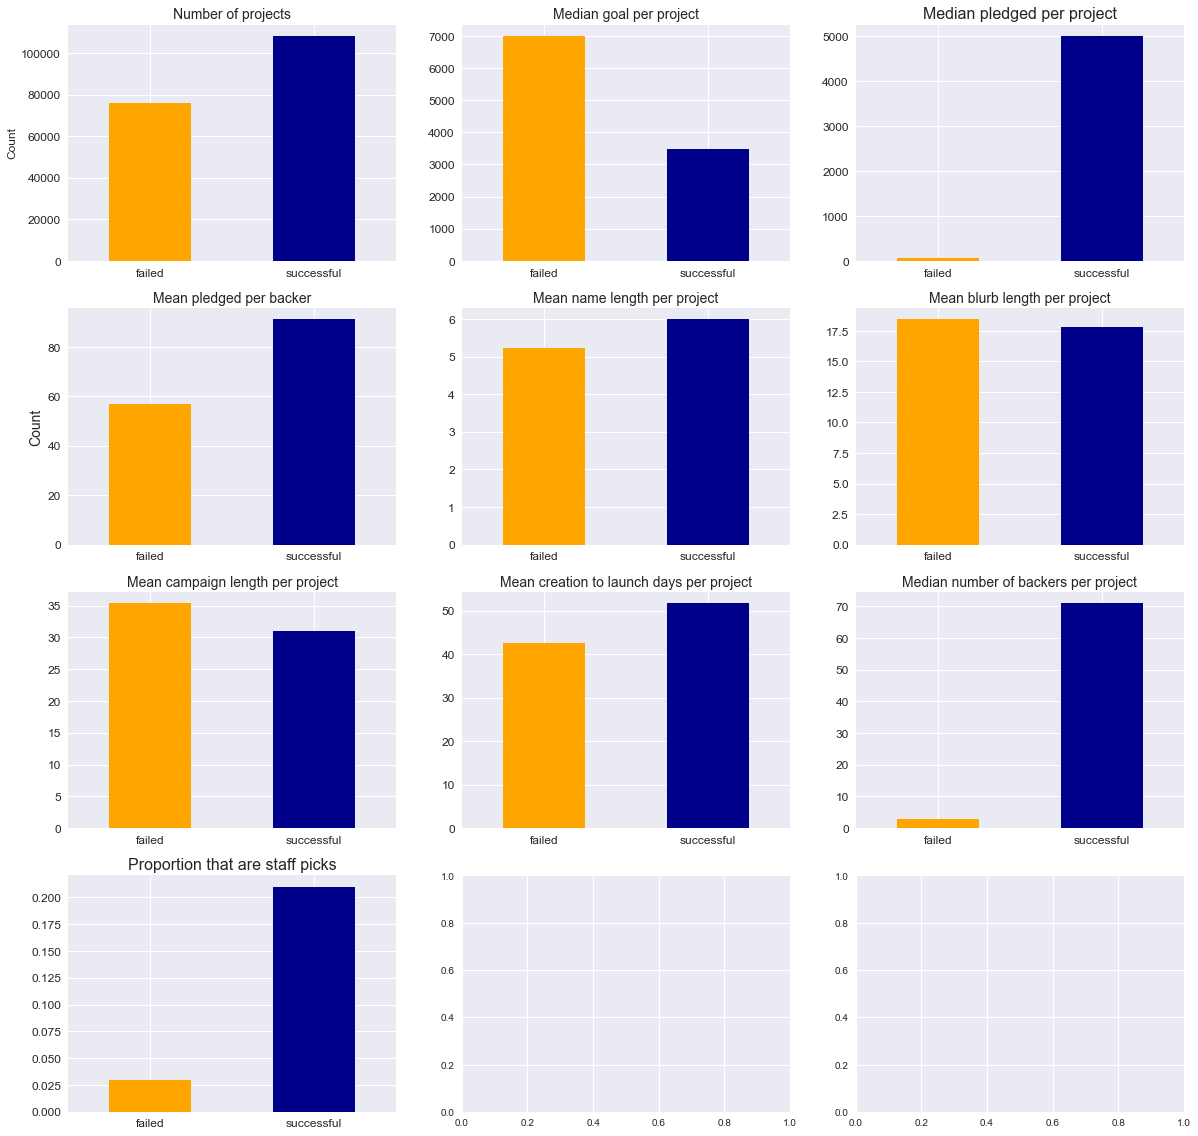

In [42]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(20,20))

df['state'].value_counts(ascending=True).plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax1)
ax1.set_title('Number of projects', fontsize=14)
ax1.set_ylabel('Count', fontsize=12)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

df.groupby('state').usd_goal.median().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax2)
ax2.set_title('Median goal per project', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)
ax2.set_xlabel('', fontsize=12)

df.groupby('state').usd_pledged.median().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax3)
ax3.set_title('Median pledged per project', fontsize=16)
ax3.set_ylabel('', fontsize=14)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)
ax3.set_xlabel('', fontsize=12)

df.groupby('state').pledge_per_backer.mean().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax4)
ax4.set_title('Mean pledged per backer', fontsize=14)
ax4.set_ylabel('Count', fontsize=14)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)
ax4.set_xlabel('', fontsize=12)


df.groupby('state').name_length.mean().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax5)
ax5.set_title('Mean name length per project', fontsize=14)
ax5.set_ylabel('', fontsize=14)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)
ax5.set_xlabel('', fontsize=12)


df.groupby('state').blurb_length.mean().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax6)
ax6.set_title('Mean blurb length per project', fontsize=14)
ax6.set_ylabel('', fontsize=14)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)
ax6.set_xlabel('', fontsize=12)

df.groupby('state').campaign_length.mean().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax7)
ax7.set_title('Mean campaign length per project', fontsize=14)
ax7.set_ylabel('', fontsize=14)
ax7.set_xlabel('')
ax7.xaxis.set_tick_params(labelsize=12)
ax7.yaxis.set_tick_params(labelsize=12)
ax7.set_xlabel('', fontsize=12)

df.groupby('state').creation_to_launch.mean().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax8)
ax8.set_title('Mean creation to launch days per project', fontsize=14)
ax8.set_ylabel('', fontsize=14)
ax8.set_xlabel('')
ax8.xaxis.set_tick_params(labelsize=12)
ax8.yaxis.set_tick_params(labelsize=12)
ax8.set_xlabel('', fontsize=12)

df.groupby('state').backers_count.median().plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax9)
ax9.set_title('Median number of backers per project', fontsize=14)
ax9.set_ylabel('', fontsize=14)
ax9.set_xlabel('')
ax9.xaxis.set_tick_params(labelsize=12)
ax9.yaxis.set_tick_params(labelsize=12)
ax9.set_xlabel('', fontsize=12)

pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', color=['orange','darkblue'], rot=0, ax=ax10) 
ax10.set_title('Proportion that are staff picks', fontsize=16)
ax10.set_ylabel('', fontsize=14)
ax10.set_xlabel('')
ax10.xaxis.set_tick_params(labelsize=12)
ax10.yaxis.set_tick_params(labelsize=12)
ax10.set_xlabel('', fontsize=12)


__So we see that:__<br>
compared to failed projects, successful projects have:<br>
lower funding goal<br>
much lower pledged (makes sense cuz if failed wont gain any money)<br>
higher pledge per backer<br>
slightly shorter name length<br>
similar blurb length<br>
slightly shorter campaign length<br>
slightly longer days from creation to launch<br>
most are staff picked<br>

__How has fundraising changed over time?__
total amount pledged over the years (2009-2021)
total number of projects created over the year

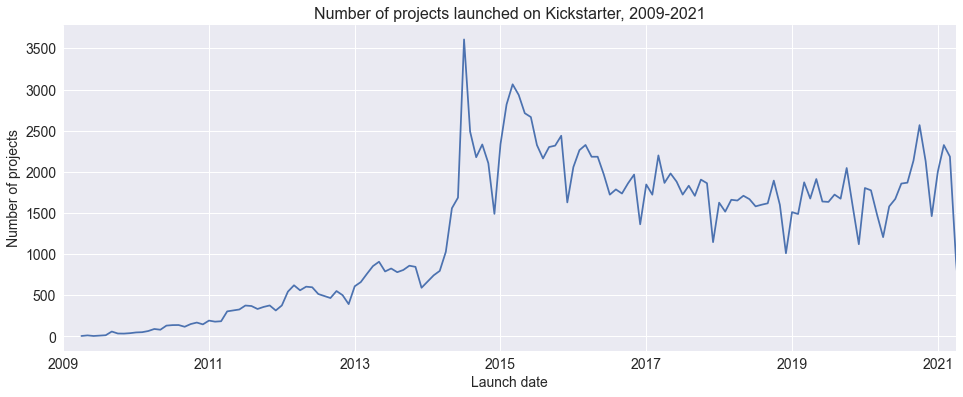

In [43]:
#get launch date and count number of projects created in that month
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('M').count().plot()
plt.xlim('2009-01-01', '2021-04-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=14)
plt.ylabel('Number of projects', fontsize=14)
plt.title('Number of projects launched on Kickstarter, 2009-2021', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

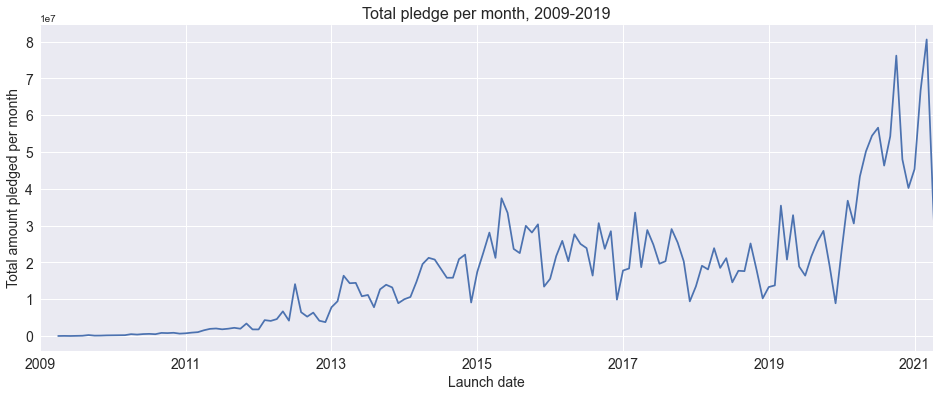

In [44]:
#total amount of pledged money by month:
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.resample('M').sum().plot()
plt.xlim('2009-01-01', '2021-04-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=14)
plt.ylabel('Total amount pledged per month', fontsize=14)
plt.title('Total pledge per month, 2009-2019', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

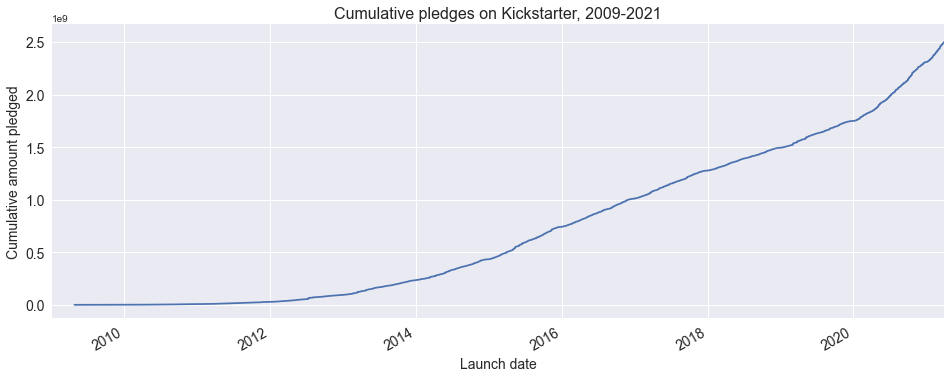

In [45]:
#cumulative amount of pledged money over the years:
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2009-01-01', '2021-04-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=14)
plt.ylabel('Cumulative amount pledged', fontsize=14)
plt.title('Cumulative pledges on Kickstarter, 2009-2021', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [46]:
print("Average amount pledged per project in each year, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(),2))

Average amount pledged per project in each year, in $:
launched_at
2009-01-01     3737.68
2010-01-01     4737.86
2011-01-01     5908.43
2012-01-01    10573.08
2013-01-01    15172.34
2014-01-01     9623.32
2015-01-01    10378.82
2016-01-01    11492.02
2017-01-01    12281.64
2018-01-01    11364.89
2019-01-01    12843.81
2020-01-01    26012.47
2021-01-01    31060.03
Freq: AS-JAN, Name: usd_pledged, dtype: float64


In [47]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))

Average fundraising goal per project in each year, in $:
launched_at
2009-01-01     4003.36
2010-01-01     5220.47
2011-01-01     6002.11
2012-01-01     8663.58
2013-01-01    12487.94
2014-01-01    34880.85
2015-01-01    69591.30
2016-01-01    52160.82
2017-01-01    55024.83
2018-01-01    22892.30
2019-01-01    26670.99
2020-01-01    26180.67
2021-01-01    14180.58
Freq: AS-JAN, Name: usd_goal, dtype: float64


Surprising that covid does not decrease the amount pledged or amount of new projects launched. 2020 and 2021 record the highest mean amount pledged per project.

In [48]:
# Creating a dataframe grouped by year with columns for number of failed and successful per year
year_df = df.set_index('launched_at').state
year_df=pd.get_dummies(year_df).resample('YS').sum()
year_df.head(5)

,failed,successful
launched_at,,
2009-01-01,38.0,175.0
2010-01-01,306.0,1016.0
2011-01-01,743.0,2884.0
2012-01-01,1334.0,4884.0
2013-01-01,1683.0,7602.0


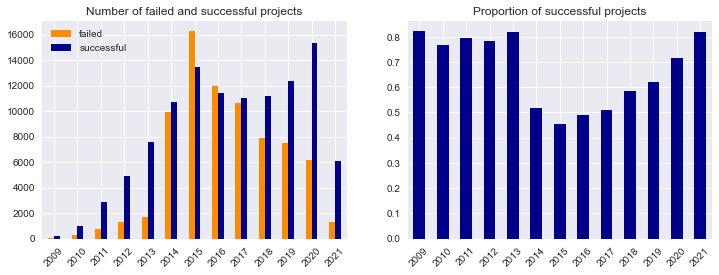

In [49]:
# Plotting the number and proportion of failed and successful projects each year
fig, ax = plt.subplots(1,2, figsize=(12,4))
year_df.plot.bar(ax=ax[0], color=['darkorange', 'darkblue'])
ax[0].set_title('Number of failed and successful projects')
ax[0].set_xlabel('')
ax[0].set_xticklabels(list(range(2009,2022)), rotation=45)

year_df.div(year_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax[1], color='darkblue') # Normalizes counts across rows
ax[1].set_title('Proportion of successful projects')
ax[1].set_xlabel('')
ax[1].set_xticklabels(list(range(2009,2022)), rotation=45)

plt.show()

__What types of projects do people launch and which are more successful?__<br>
- categories with most projects
- median goal by category
- median pledge by category
- proportion of successful project
- median backer per project
- median pledge per backer


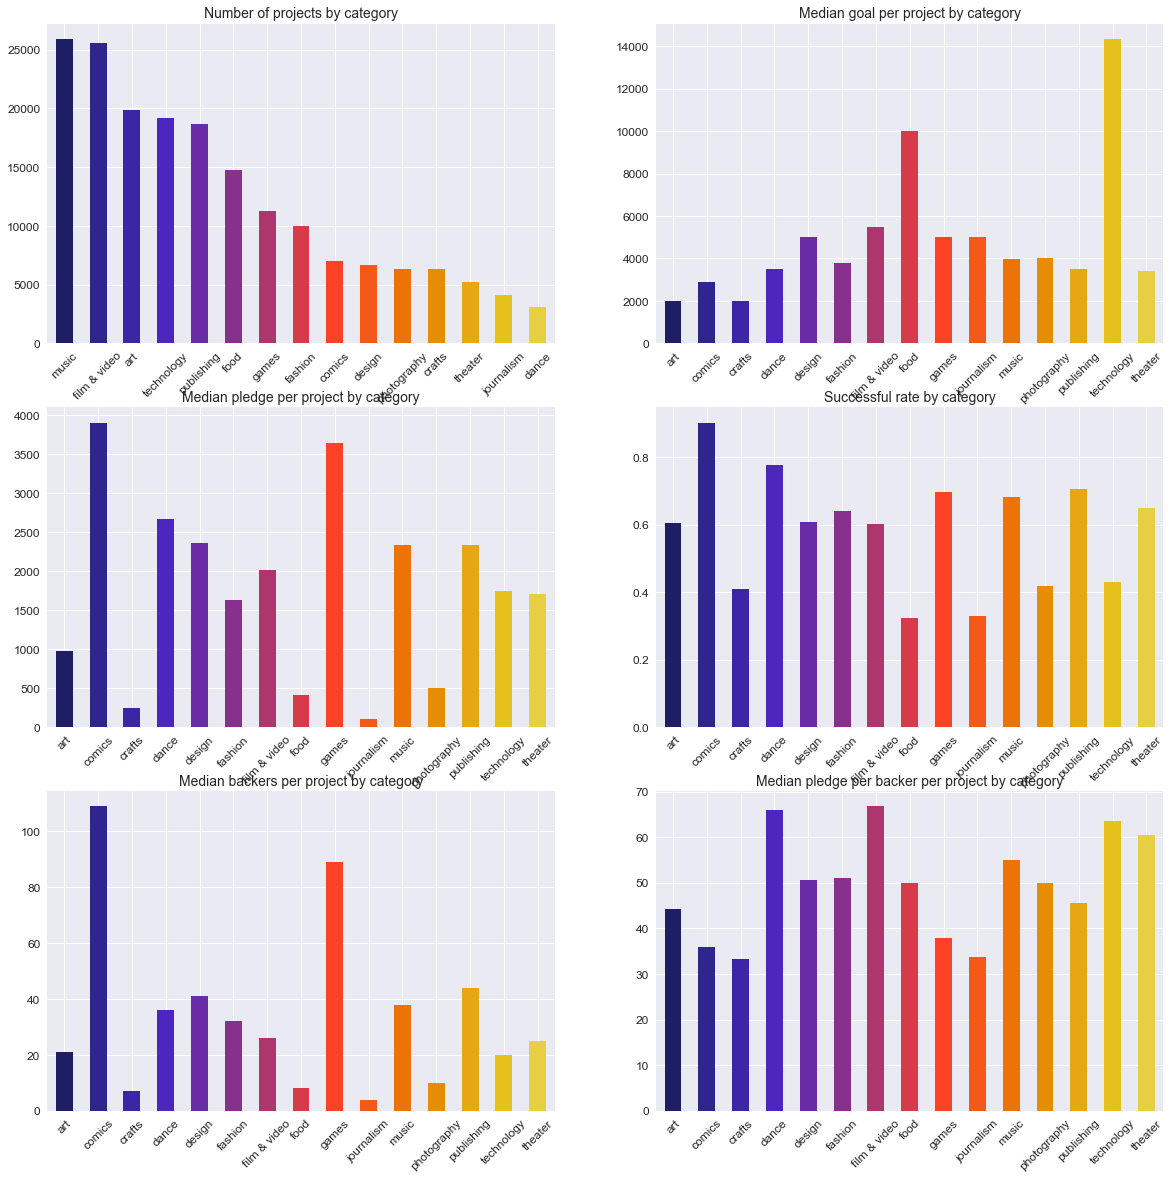

In [50]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20))

#count of projects by category:
color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap
df['category'].value_counts().plot(kind='bar',color=color, rot=45, ax=ax1)
ax1.set_title('Number of projects by category', fontsize=14)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

#median goal by category
df.groupby('category').usd_goal.median().plot(kind='bar', color=color, rot=45, ax=ax2)
ax2.set_title('Median goal per project by category', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.set_xlabel('')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

#median pledge by category
df.groupby('category').usd_pledged.median().plot(kind='bar', color=color, rot=45, ax=ax3)
ax3.set_title('Median pledge per project by category', fontsize=14)
ax3.set_ylabel('', fontsize=12)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()
cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', color=color,  rot=45, ax=ax4)
ax4.set_title('Successful rate by category', fontsize=14)
ax4.set_ylabel('', fontsize=12)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)

#median backer per project by category
df.groupby('category').backers_count.median().plot(kind='bar', color=color, rot=45, ax=ax5)
ax5.set_title('Median backers per project by category', fontsize=14)
ax5.set_ylabel('', fontsize=12)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)


#median pledge per backer by category
df.groupby('category').pledge_per_backer.median().plot(kind='bar', color=color, rot=45, ax=ax6)
ax6.set_title('Median pledge per backer per project by category', fontsize=14)
ax6.set_ylabel('', fontsize=12)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)


__Here we learn that:__<br>
music, film&video, art, tech, publishing are most popular<br>
comics, dance, games, publishing, music have highest success rate of all categories<br>
comics, games have significantly higher amounts of backer per project than others<br>
but comics and games have low median pledge per backers compared to others<br>
	dance, film&video, tech, theater, music have the highest pledge per backers<br>
comics, games have significantly higher amounts of median pledge per project of all categories<br>
tech has significantly higher median goal per project than others. followed by food<br>


__Where do project owners come from and are some countries more successful than others?__<br>
- countries with most projects
- median goal by country
- median pledge by country
- proportion of successful project by country
- median backer per project
- median pledge per backer



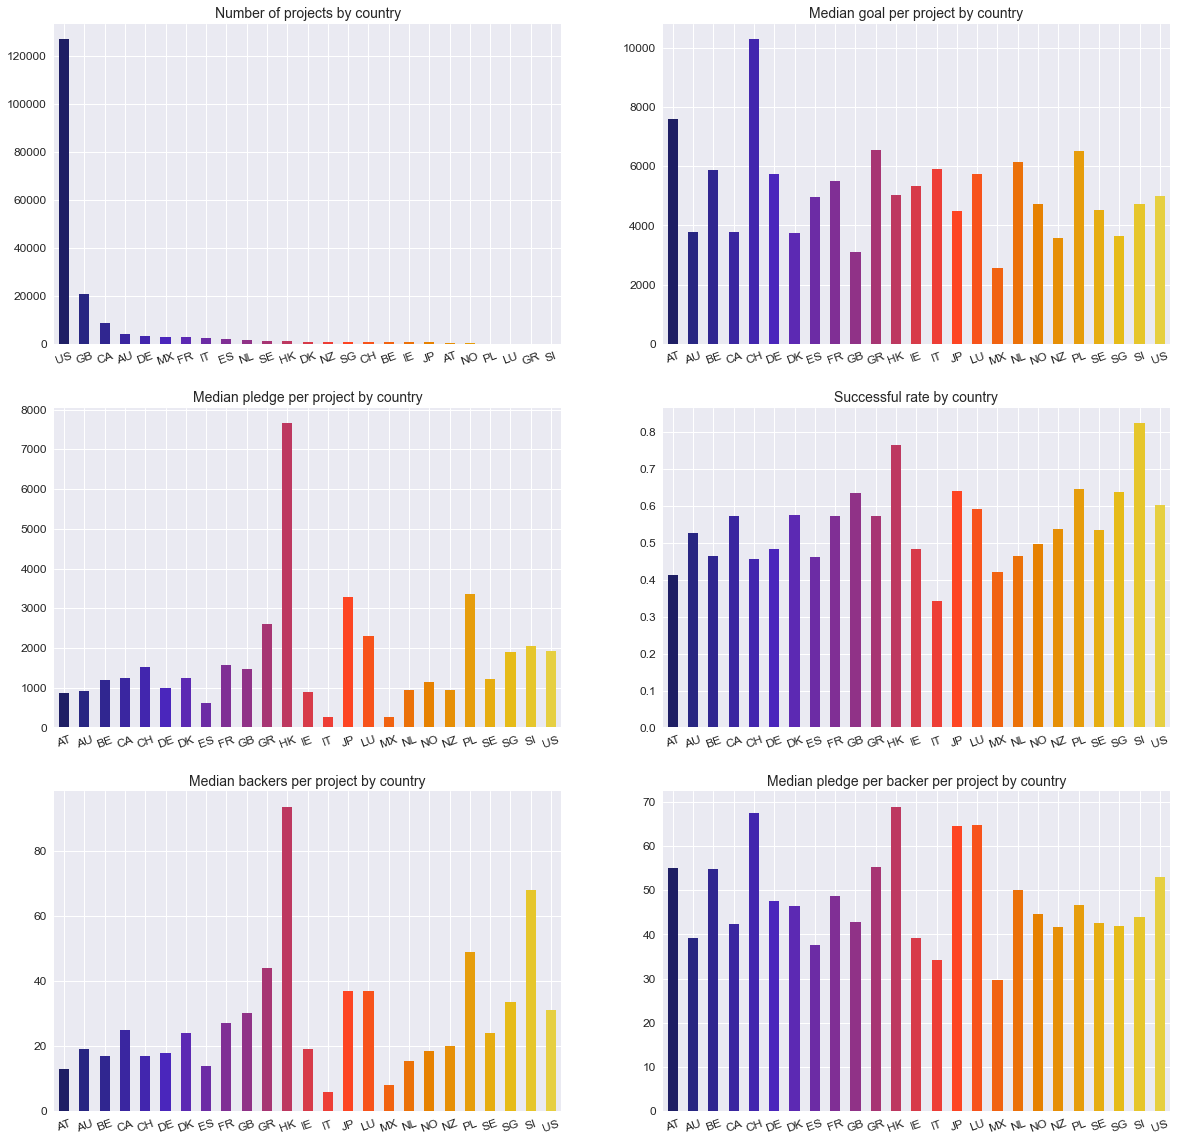

In [51]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20))

#count of projects by category:
color_ct = cm.CMRmap(np.linspace(0.1,0.8,df.country.nunique())) # Setting a colormap
df['country'].value_counts().plot(kind='bar',color=color_ct, rot=20, ax=ax1)
ax1.set_title('Number of projects by country', fontsize=14)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

#median goal by country
df.groupby('country').usd_goal.median().plot(kind='bar', color=color_ct, rot=20, ax=ax2)
ax2.set_title('Median goal per project by country', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.set_xlabel('')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

#median pledge by country
df.groupby('country').usd_pledged.median().plot(kind='bar', color=color_ct, rot=20, ax=ax3)
ax3.set_title('Median pledge per project by country', fontsize=14)
ax3.set_ylabel('', fontsize=12)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

# Creating a dataframe grouped by country with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('country').state).groupby('country').sum()
cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', color=color_ct,  rot=20, ax=ax4)
ax4.set_title('Successful rate by country', fontsize=14)
ax4.set_ylabel('', fontsize=12)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)


#median backer per project by country
df.groupby('country').backers_count.median().plot(kind='bar', color=color_ct, rot=20, ax=ax5)
ax5.set_title('Median backers per project by country', fontsize=14)
ax5.set_ylabel('', fontsize=12)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)

#median pledge per backer by country
df.groupby('country').pledge_per_backer.median().plot(kind='bar', color=color_ct, rot=20, ax=ax6)
ax6.set_title('Median pledge per backer per project by country', fontsize=14)
ax6.set_ylabel('', fontsize=12)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)


__Country graphs - we learn that:__<br>
US has significantly higher amount of projects launched <br>
Switzerland (CH) has highest median goal per project, followed by Austria(AT)<br>
HK has the highest median pledge per project<br>
Singapore has the highest success rate, followed by HK, JP, Poland<br>
HK has the highest median backers per project, followed by singapore<br>
HK has the highest median pledge per backer, followed by Switzerland, JP, LU<br>



__When is the best time to launch a project?__<br>
- counts of projects by month of year
- counts of projects by day of week
- counts of projects by hour of day


In [52]:
success = df[df['state']=='successful']
failure = df[df['state']=='failed']

In [53]:
df.head(5)

,backers_count,country,created_at,deadline,is_starrable,launched_at,spotlight,staff_pick,state,static_usd_rate,usd_exchange_rate,usd_pledged,blurb_length,name_length,category,sub_category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,,,,,,,,
189897203,28,US,2013-09-29 12:27:00,2014-05-08 00:00:36,False,2014-04-08 00:00:36,True,False,successful,1.000000,1.000000,1315.0,22.0,7,music,indie rock,1200.00,190,30,Tuesday,Thursday,April,May,0,0,46.96
888478499,19,US,2016-08-17 18:13:13,2016-09-20 19:46:47,False,2016-08-21 19:46:47,False,False,failed,1.000000,1.000000,862.0,9.0,4,music,electronic music,2000.00,4,30,Sunday,Tuesday,August,September,19,19,45.37
1751991700,60,US,2013-02-20 00:17:04,2013-11-02 03:59:00,False,2013-09-30 17:36:17,True,False,successful,1.000000,1.000000,12194.0,13.0,9,music,classical music,12000.00,222,32,Monday,Saturday,September,November,17,3,203.23
1840471726,0,US,2015-11-08 17:54:50,2015-12-08 18:47:38,False,2015-11-08 18:47:38,False,False,failed,1.000000,1.000000,0.0,16.0,6,music,electronic music,1750.00,0,30,Sunday,Tuesday,November,December,18,18,NaN
10457111,0,GB,2014-06-25 11:47:48,2014-08-22 22:21:41,False,2014-07-08 22:21:41,False,False,failed,1.714466,1.657803,0.0,20.0,5,music,kids,17144.66,13,45,Tuesday,Friday,July,August,22,22,NaN


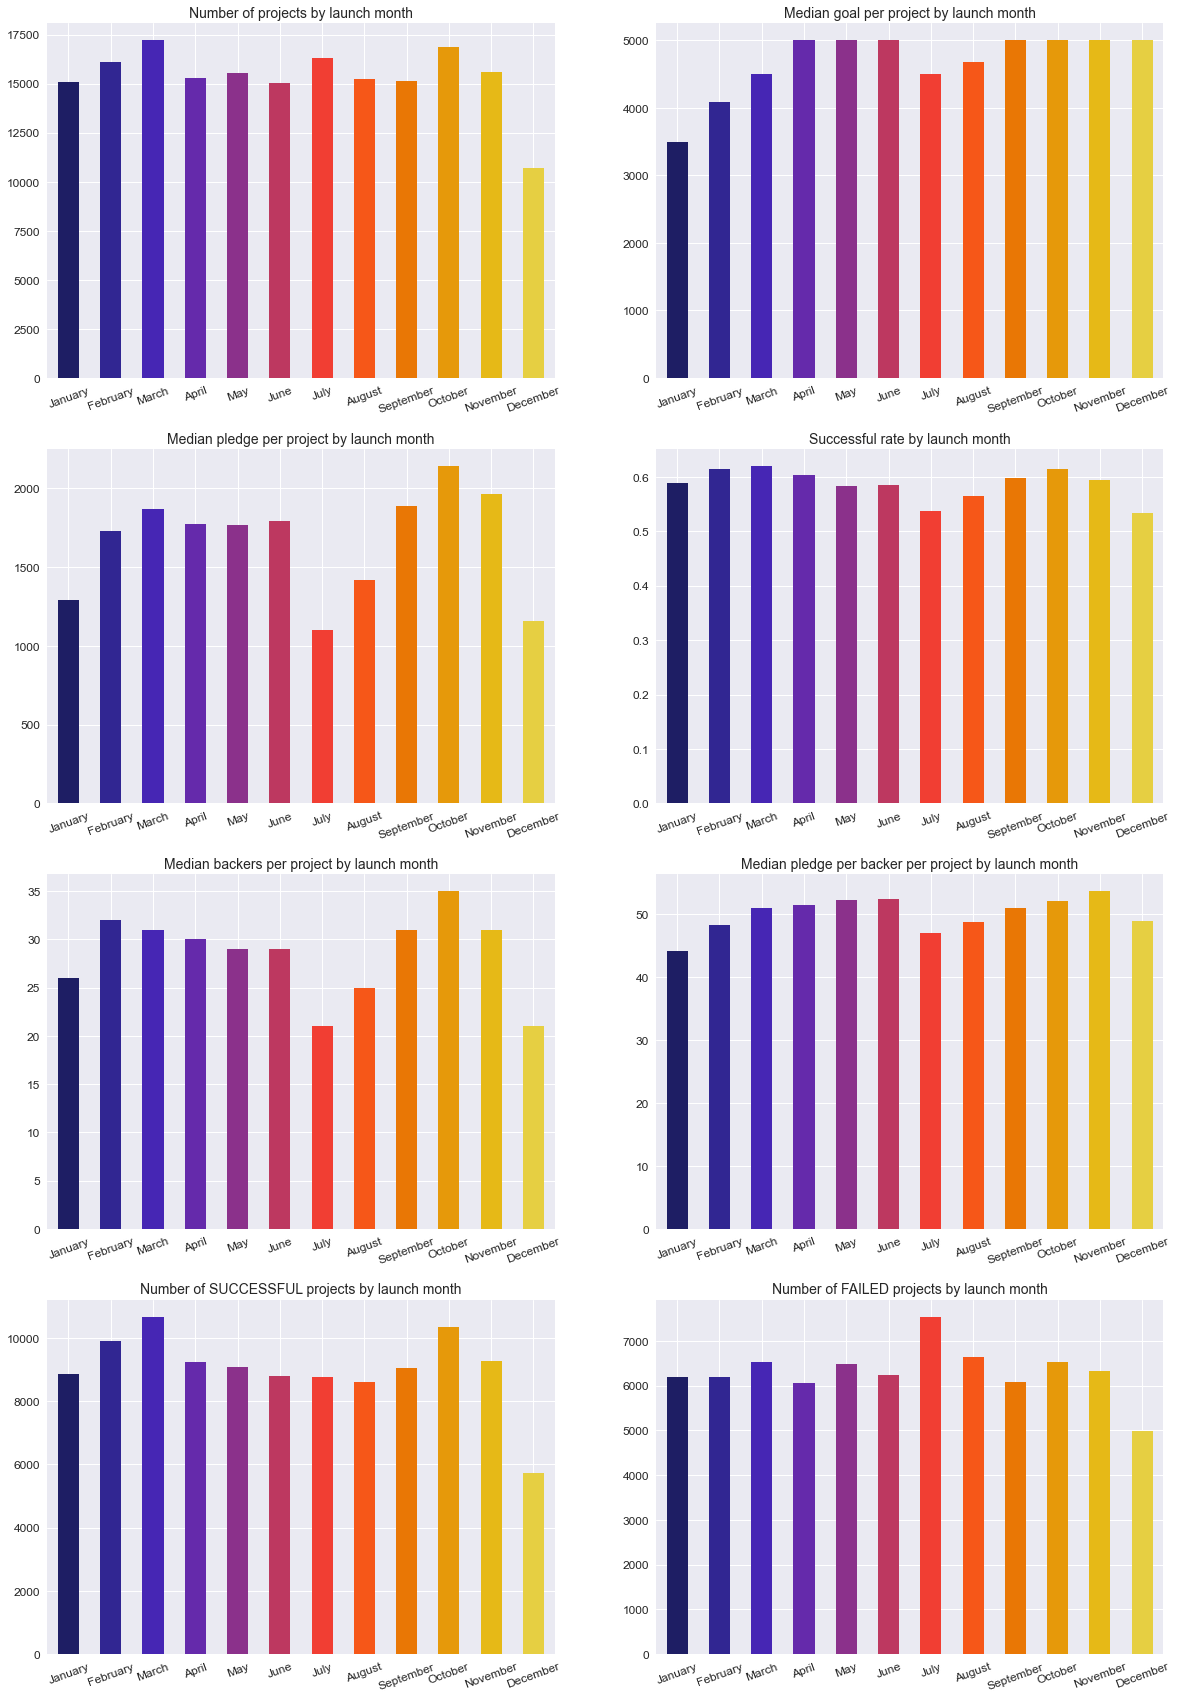

In [54]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(20,30))

#count of projects by month:
color1 = cm.CMRmap(np.linspace(0.1,0.8,df.launch_month.nunique())) # Setting a colormap
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['launch_month'].value_counts().reindex(months).plot(kind='bar',color=color1, rot=20, ax=ax1)
ax1.set_title('Number of projects by launch month', fontsize=14)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

success['launch_month'].value_counts().reindex(months).plot(kind='bar',color=color1, rot=20, ax=ax7)
ax7.set_title('Number of SUCCESSFUL projects by launch month', fontsize=14)
ax7.set_ylabel('', fontsize=12)
ax7.set_xlabel('')
ax7.xaxis.set_tick_params(labelsize=12)
ax7.yaxis.set_tick_params(labelsize=12)

failure['launch_month'].value_counts().reindex(months).plot(kind='bar',color=color1, rot=20, ax=ax8)
ax8.set_title('Number of FAILED projects by launch month', fontsize=14)
ax8.set_ylabel('', fontsize=12)
ax8.set_xlabel('')
ax8.xaxis.set_tick_params(labelsize=12)
ax8.yaxis.set_tick_params(labelsize=12)

#median goal by month
df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', color=color1, rot=20, ax=ax2)
ax2.set_title('Median goal per project by launch month', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.set_xlabel('')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

#median pledge by month
df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', color=color1, rot=20, ax=ax3)
ax3.set_title('Median pledge per project by launch month', fontsize=14)
ax3.set_ylabel('', fontsize=12)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

# Creating a dataframe grouped by country with columns for failed and successful
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()
month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', color=color1,  rot=20, ax=ax4)
ax4.set_title('Successful rate by launch month', fontsize=14)
ax4.set_ylabel('', fontsize=12)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)


#median backer per project by country
df.groupby('launch_month').backers_count.median().reindex(months).plot(kind='bar', color=color1, rot=20, ax=ax5)
ax5.set_title('Median backers per project by launch month', fontsize=14)
ax5.set_ylabel('', fontsize=12)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)

#median pledge per backer by country
df.groupby('launch_month').pledge_per_backer.median().reindex(months).plot(kind='bar', color=color1, rot=20, ax=ax6)
ax6.set_title('Median pledge per backer per project by launch month', fontsize=14)
ax6.set_ylabel('', fontsize=12)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)



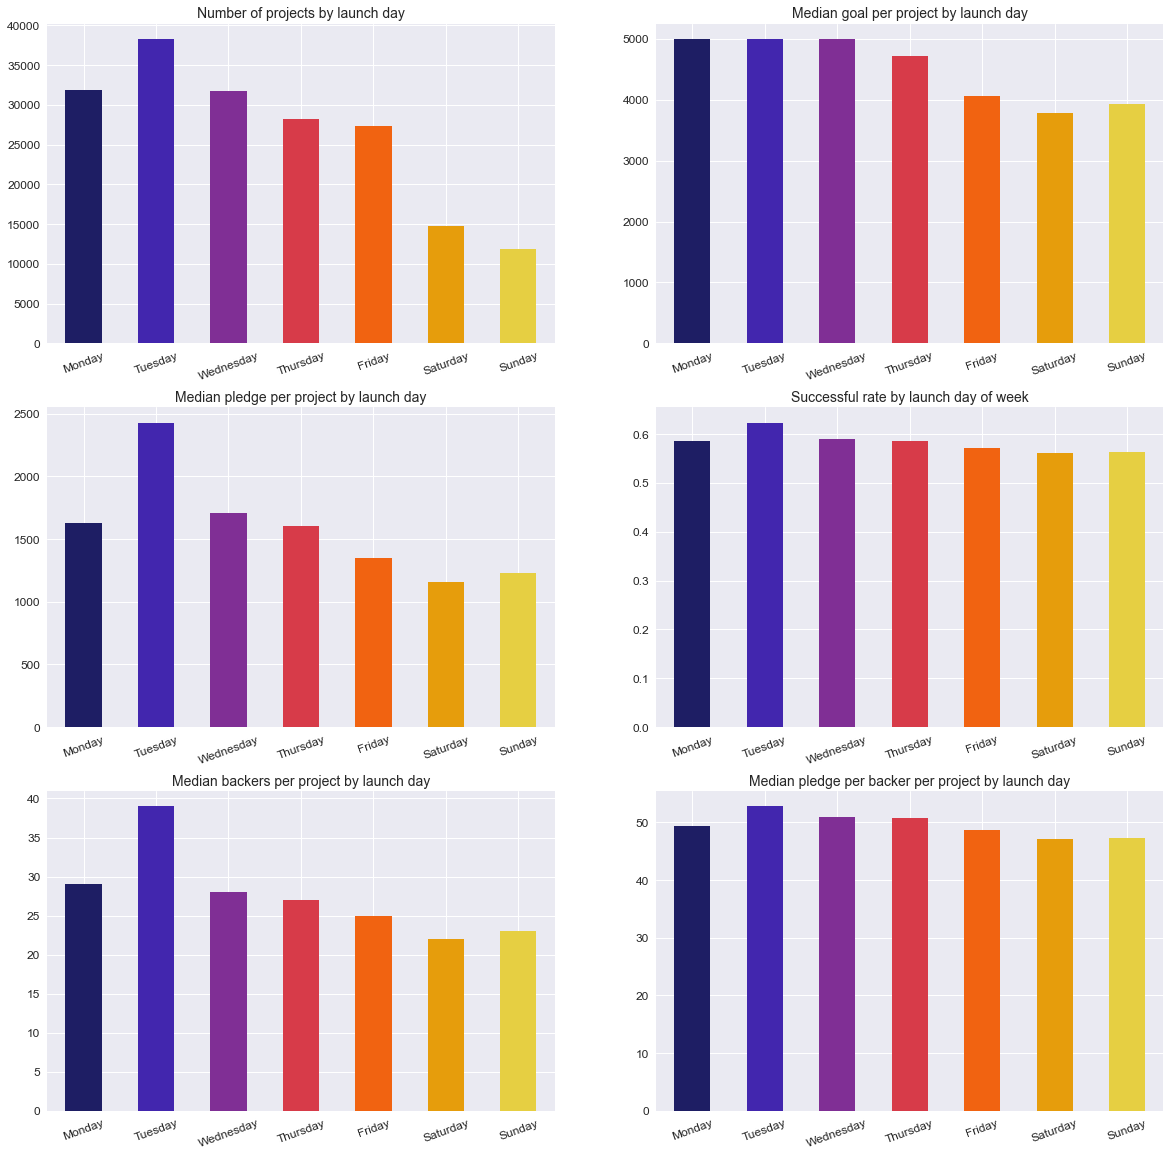

In [55]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20))

#count of projects by month:
color2 = cm.CMRmap(np.linspace(0.1,0.8,df.launch_day.nunique())) # Setting a colormap

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['launch_day'].value_counts().reindex(weekdays).plot(kind='bar',color=color2, rot=20, ax=ax1)
ax1.set_title('Number of projects by launch day', fontsize=14)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)


#median goal by month
df.groupby('launch_day').usd_goal.median().reindex(weekdays).plot(kind='bar', color=color2, rot=20, ax=ax2)
ax2.set_title('Median goal per project by launch day', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.set_xlabel('')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

#median pledge by month
df.groupby('launch_day').usd_pledged.median().reindex(weekdays).plot(kind='bar', color=color2, rot=20, ax=ax3)
ax3.set_title('Median pledge per project by launch day', fontsize=14)
ax3.set_ylabel('', fontsize=12)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

# Creating a dataframe grouped by country with columns for failed and successful
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()
day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', color=color2,  rot=20, ax=ax4)
ax4.set_title('Successful rate by launch day of week', fontsize=14)
ax4.set_ylabel('', fontsize=12)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)


#median backer per project by country
df.groupby('launch_day').backers_count.median().reindex(weekdays).plot(kind='bar', color=color2, rot=20, ax=ax5)
ax5.set_title('Median backers per project by launch day', fontsize=14)
ax5.set_ylabel('', fontsize=12)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)

#median pledge per backer by country
df.groupby('launch_day').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', color=color2, rot=20, ax=ax6)
ax6.set_title('Median pledge per backer per project by launch day', fontsize=14)
ax6.set_ylabel('', fontsize=12)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)



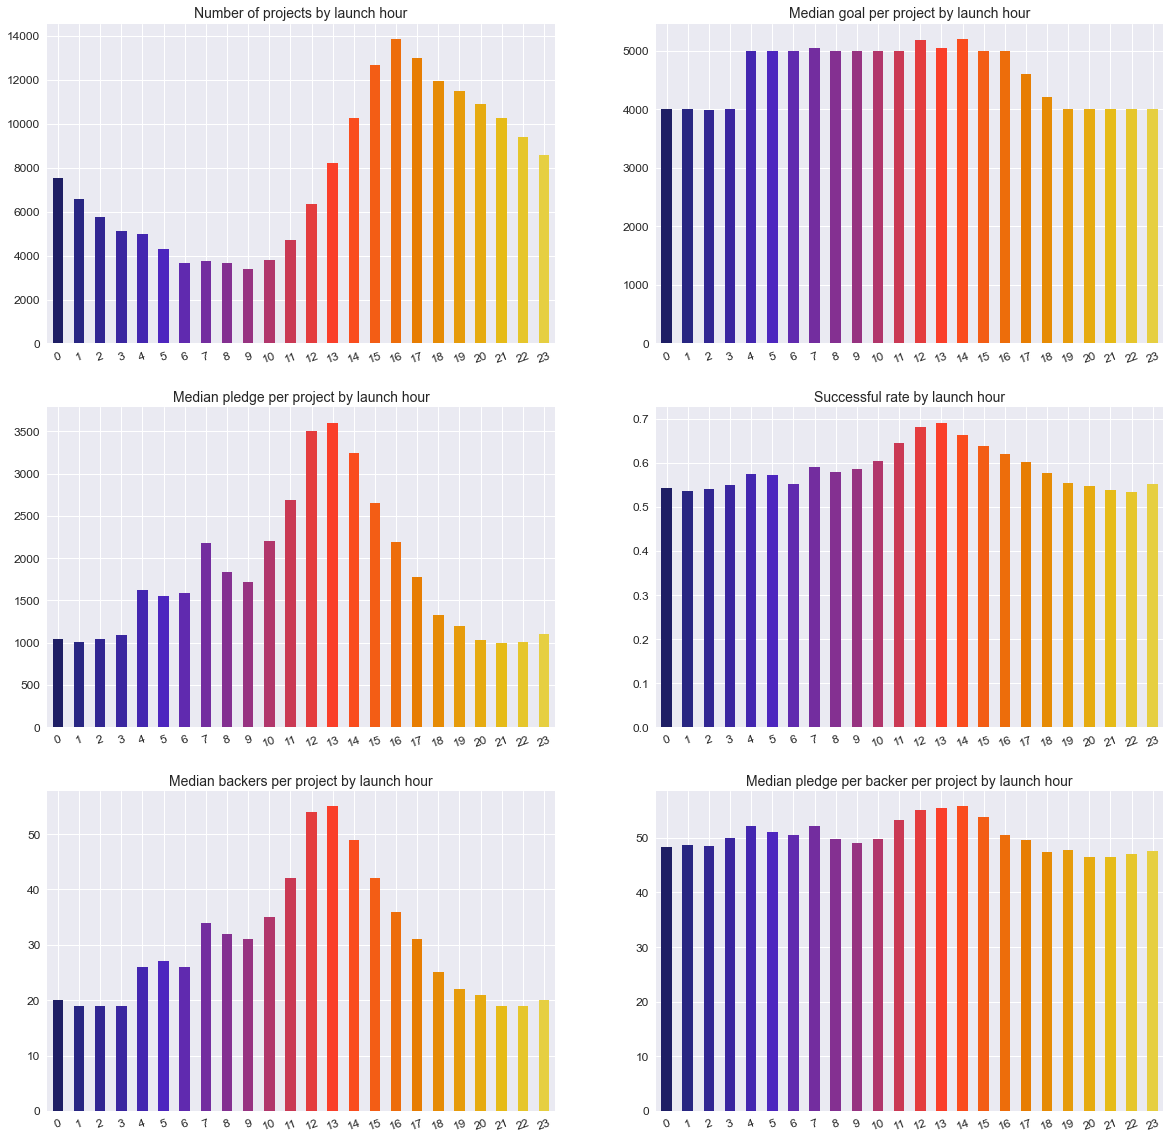

In [56]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20))

#count of projects by hour:
color3 = cm.CMRmap(np.linspace(0.1,0.8,df.launch_hour.nunique())) # Setting a colormap
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

df['launch_hour'].value_counts().reindex(hours).plot(kind='bar',color=color3, rot=20, ax=ax1)
ax1.set_title('Number of projects by launch hour', fontsize=14)
ax1.set_ylabel('', fontsize=12)
ax1.set_xlabel('')
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

#median goal by month
df.groupby('launch_hour').usd_goal.median().reindex(hours).plot(kind='bar', color=color3, rot=20, ax=ax2)
ax2.set_title('Median goal per project by launch hour', fontsize=14)
ax2.set_ylabel('', fontsize=12)
ax2.set_xlabel('')
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=12)

#median pledge by month
df.groupby('launch_hour').usd_pledged.median().reindex(hours).plot(kind='bar', color=color3, rot=20, ax=ax3)
ax3.set_title('Median pledge per project by launch hour', fontsize=14)
ax3.set_ylabel('', fontsize=12)
ax3.set_xlabel('')
ax3.xaxis.set_tick_params(labelsize=12)
ax3.yaxis.set_tick_params(labelsize=12)

# Creating a dataframe grouped by country with columns for failed and successful
hour_df = pd.get_dummies(df.set_index('launch_hour').state).groupby('launch_hour').sum()
hour_df.div(hour_df.sum(axis=1), axis=0).successful.reindex(hours).plot(kind='bar', color=color3,  rot=20, ax=ax4)
ax4.set_title('Successful rate by launch hour', fontsize=14)
ax4.set_ylabel('', fontsize=12)
ax4.set_xlabel('')
ax4.xaxis.set_tick_params(labelsize=12)
ax4.yaxis.set_tick_params(labelsize=12)


#median backer per project by country
df.groupby('launch_hour').backers_count.median().reindex(hours).plot(kind='bar', color=color3, rot=20, ax=ax5)
ax5.set_title('Median backers per project by launch hour', fontsize=14)
ax5.set_ylabel('', fontsize=12)
ax5.set_xlabel('')
ax5.xaxis.set_tick_params(labelsize=12)
ax5.yaxis.set_tick_params(labelsize=12)

#median pledge per backer by country
df.groupby('launch_hour').pledge_per_backer.median().reindex(hours).plot(kind='bar', color=color3, rot=20, ax=ax6)
ax6.set_title('Median pledge per backer per project by launch hour', fontsize=14)
ax6.set_ylabel('', fontsize=12)
ax6.set_xlabel('')
ax6.xaxis.set_tick_params(labelsize=12)
ax6.yaxis.set_tick_params(labelsize=12)



__Checking distributions__

3. Once our data has been prepared, we train the model over the training data followed by testing it over the test data. Our final step is improving our model to yield even better accuracy.
- This is a classification problem because the varialbe to be predicted is categorical (success/ failure). 
- We will first try logistic regression, which is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The intention behind using logistic regression is to find the best fitting model to describe the relationship between the dependent and the independent variable.
- Basically, we are trying to convert a predicted probability into a class label is decided by the parameter known as Threshold. A value above that threshold indicates one class while the one below indicates the other.
- Logistic regression uses a logistic function to model the dependent variable. The dependent variable is dichotomous in nature, i.e. there could only be two possible classes (eg.: either the cancer is malignant or not). As a result, this technique is used while dealing with binary data.
- Logistic regression uses sigmoid function - it maps any real value into another value between 0 to 1. This function has a non-negative derivative at each point and exactly one inflection point.
- We want to minimize the cost function: mathematical formula used to quantify the error between the predicted values and the expected values.

First step is Feature Engineering
1. create 2 dataframes for people with high vs. low risk of heart disease
2. visualize data to see which feature may yield the most optimum results
3. scale the data as LR is sensitive to scaled/ non-scaled data (e.g. might think 5KG<3000gram - erroneous)


Preparing the model:
1. split the dataset to training and testing data with a given random state
2. import LG from sklearn and fit regression over training data. 
3. calculate model score, use confusion matrix to assess performance of the model (Positive and Negative) - calculate Accuracy, ROC Score, Precision, F Score etc.


**Checking distributions of variables - to see if log-transform is needed**

In [57]:
#we can remove unused columns
#Dropping columns that are not useful
df=df.drop(['static_usd_rate', 'usd_exchange_rate'],axis=1)

array([[<AxesSubplot:title={'center':'backers_count'}>,
        <AxesSubplot:title={'center':'usd_pledged'}>,
        <AxesSubplot:title={'center':'blurb_length'}>],
       [<AxesSubplot:title={'center':'name_length'}>,
        <AxesSubplot:title={'center':'usd_goal'}>,
        <AxesSubplot:title={'center':'creation_to_launch'}>],
       [<AxesSubplot:title={'center':'campaign_length'}>,
        <AxesSubplot:title={'center':'launch_hour'}>,
        <AxesSubplot:title={'center':'deadline_hour'}>],
       [<AxesSubplot:title={'center':'pledge_per_backer'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

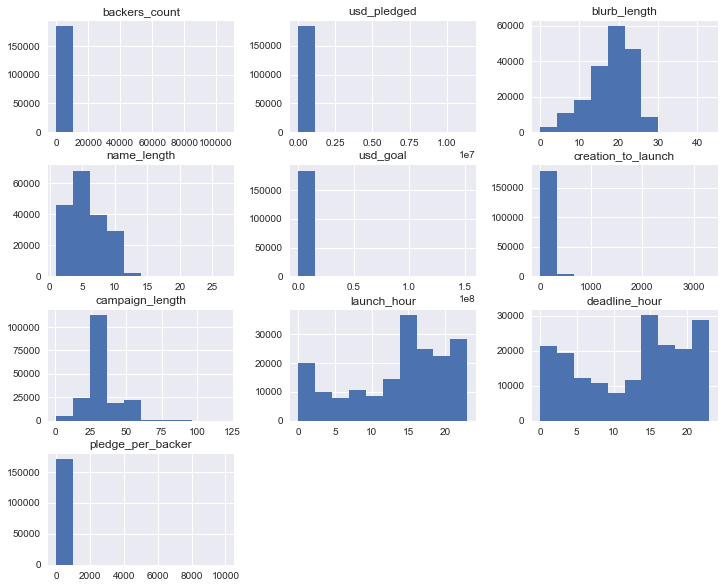

In [58]:
df[df.describe().columns].hist(figsize=(12,10))

Except for blurb_length, other variables are highly right-skewed. Might need to do log-transform later. But will fit the variables as they are first and see how well the model runs.

Need to drop features that are not useful for machine learning models: datetime types, features that are related to outcomes (amount pledged, number of backers, pledge per backer) rather than related to the properties of the project, categorical variables with too many one-hot encoded features (sub_category, n=146), and features with only one category (is_starrable).

In [59]:
df_model = df.drop(['spotlight', 'usd_pledged', 'backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'pledge_per_backer', 'sub_category'],axis=1)
df_model.head(5)

,country,staff_pick,state,blurb_length,name_length,category,usd_goal,creation_to_launch,campaign_length,launch_day,deadline_day,launch_month,deadline_month,launch_hour,deadline_hour
id,,,,,,,,,,,,,,,
189897203,US,False,successful,22.0,7,music,1200.00,190,30,Tuesday,Thursday,April,May,0,0
888478499,US,False,failed,9.0,4,music,2000.00,4,30,Sunday,Tuesday,August,September,19,19
1751991700,US,False,successful,13.0,9,music,12000.00,222,32,Monday,Saturday,September,November,17,3
1840471726,US,False,failed,16.0,6,music,1750.00,0,30,Sunday,Tuesday,November,December,18,18
10457111,GB,False,failed,20.0,5,music,17144.66,13,45,Tuesday,Friday,July,August,22,22


<AxesSubplot:>

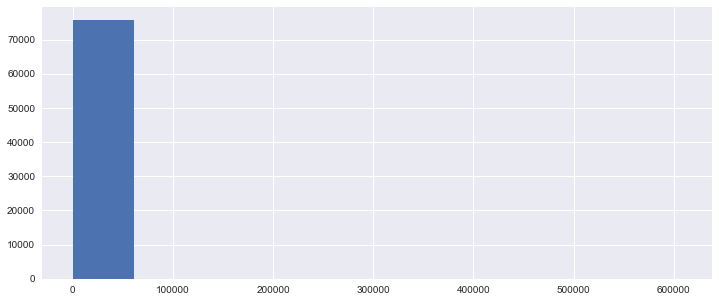

In [60]:
failure.usd_pledged.hist()

In [61]:
failure.backers_count.value_counts()

1      13378
0      12774
2       9679
3       6387
4       4535
       ...  
351        1
288        1
608        1
737        1
831        1
Name: backers_count, Length: 435, dtype: int64

In [62]:
success.usd_pledged.describe()

count    1.082690e+05
mean     2.272795e+04
std      1.361480e+05
min      9.100000e-01
25%      1.816000e+03
50%      5.007000e+03
75%      1.288500e+04
max      1.138545e+07
Name: usd_pledged, dtype: float64

<AxesSubplot:>

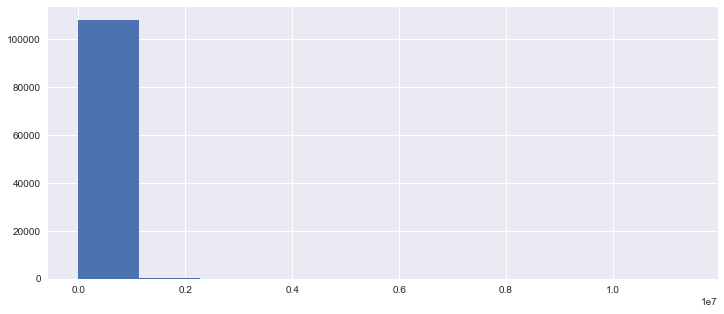

In [63]:
success.usd_pledged.hist()

Check for multi-collinearity by assessing correlations between predictor features, using multi-collinearity matrix:
- Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.
- Detect multicollinearity using a correlation matrix, and by calculating the Variance Inflation Factor (VIF):

Text(0.5, 1.0, 'Multi-Collinearity of the iris dataset')

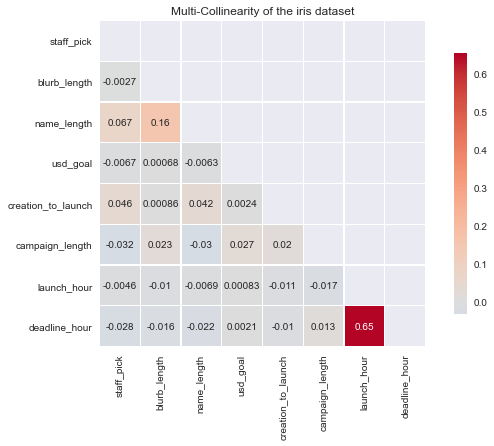

In [64]:
#Create the collinearity matrix
corr = df_model.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True) #Color
mask = np.triu(np.ones_like(corr, dtype=bool)) #Masking the diagonoal and above
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, center=0, cmap="coolwarm", square=True,
linewidth=0.3, cbar_kws={"shrink": .8}, annot=True, mask=mask)
ax.set_title("Multi-Collinearity of the iris dataset")

In [65]:
#dont think deadline_hour will matter as much

In [66]:
#deadline_hour and launch_hour are highly correlated, probably because they share the same range and are considered continuous instead of categorical varlues
#one thing we can do is to put it in categories:
#split the day into 8 intervals: 12-3, 3-6, 6-9, 9-12PM, 12-3, 3-6, 6-9, 9-12AM

def three_hr(df):
    if df['launch_hour'] in range(0,3):
        return '12-3am'
    elif df['launch_hour'] in range(3,6):
        return '3-6am'
    elif df['launch_hour'] in range(6,9):
        return '6-9am'
    elif df['launch_hour'] in range(9,12):
        return '9am-12pm'
    elif df['launch_hour'] in range(12,15):
        return '12-3pm'
    elif df['launch_hour'] in range(15,18):
        return '3-6pm'
    elif df['launch_hour'] in range(18,21):
        return '6-9pm'
    elif df['launch_hour'] in range(21,24):
        return '9pm-12am'
    
df_model['launch_hour'] = df_model.apply(three_hr, axis=1)   

In [67]:
def three_hr_deadline(df):
    if df['deadline_hour'] in range(0,3):
        return '12-3am'
    elif df['deadline_hour'] in range(3,6):
        return '3-6am'
    elif df['deadline_hour'] in range(6,9):
        return '6-9am'
    elif df['deadline_hour'] in range(9,12):
        return '9am-12pm'
    elif df['deadline_hour'] in range(12,15):
        return '12-3pm'
    elif df['deadline_hour'] in range(15,18):
        return '3-6pm'
    elif df['deadline_hour'] in range(18,21):
        return '6-9pm'
    elif df['deadline_hour'] in range(21,24):
        return '9pm-12am'
    
df_model['deadline_hour'] = df_model.apply(three_hr_deadline, axis=1)   


Text(0.5, 1.0, 'Multi-Collinearity of the iris dataset')

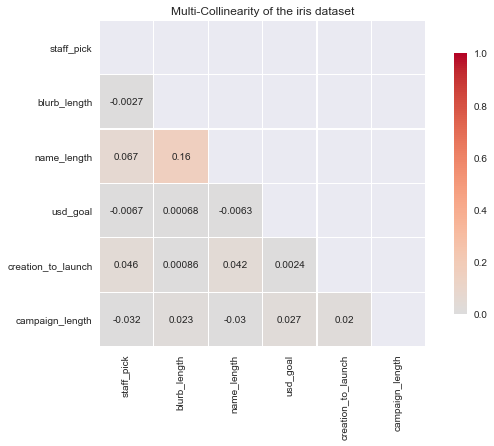

In [71]:
#Create the collinearity matrix
corr = df_model.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True) #Color
mask = np.triu(np.ones_like(corr, dtype=bool)) #Masking the diagonoal and above
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, center=0, cmap="coolwarm", square=True,
linewidth=0.3, cbar_kws={"shrink": .8}, annot=True, mask=mask, vmin=0, vmax=1)
ax.set_title("Multi-Collinearity of the iris dataset")

The collinearity matrix shows that multi-collinearity is not an issue

In [72]:
#convert explanatory variable to 0s and 1s:
df['state'] = df['state'].map({'successful':1 ,'failed':0})

In [76]:
df.staff_pick.unique()

array([False,  True])

In [75]:
#one-hot encode categorical features: